<a href="https://colab.research.google.com/github/Fin-N1049/DeepLearning/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done


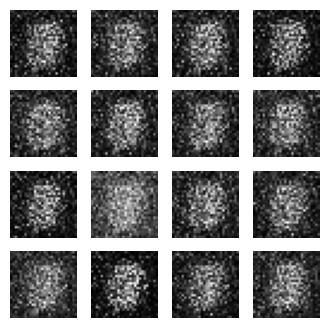

In [ ]:
# Minimal GAN Implementation in TensorFlow/Keras
# Works out of the box in Google Colab (GPU recommended)

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") - 127.5) / 127.5  # Normalize to [-1,1]
x_train = x_train.reshape(-1, 28*28)
batch_size = 128
train_ds = tf.data.Dataset.from_tensor_slices(x_train).shuffle(10000).batch(batch_size)

# Generator
generator = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(100,)),
    layers.Dense(784, activation='tanh')
])

# Discriminator
discriminator = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(1, activation='sigmoid')
])

# Optimizers & Loss
cross_entropy = tf.keras.losses.BinaryCrossentropy()
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

# Training loop (minimal)
for epoch in range(5):  # just 5 epochs for demo
    for real_imgs in train_ds:
        noise = tf.random.normal([batch_size, 100])
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            fake_imgs = generator(noise, training=True)
            real_out = discriminator(real_imgs, training=True)
            fake_out = discriminator(fake_imgs, training=True)
            gen_loss = cross_entropy(tf.ones_like(fake_out), fake_out)
            disc_loss = cross_entropy(tf.ones_like(real_out), real_out) + \
                        cross_entropy(tf.zeros_like(fake_out), fake_out)
        grads_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
        grads_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        gen_opt.apply_gradients(zip(grads_gen, generator.trainable_variables))
        disc_opt.apply_gradients(zip(grads_disc, discriminator.trainable_variables))
    print(f"Epoch {epoch+1} done")

# Generate sample
noise = tf.random.normal([16, 100])
generated = generator(noise, training=False).numpy().reshape(-1, 28, 28)

# Plot samples
fig, axes = plt.subplots(4, 4, figsize=(4,4))
for i, ax in enumerate(axes.flat):
    ax.imshow((generated[i] + 1) / 2, cmap='gray')
    ax.axis('off')
plt.show()
